In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib  inline
import os

In [2]:
os.getcwd()


'D:\\文件'

In [3]:
os.chdir('D:\\文件\\kaggle案例\\源码\\Kaggle第二课代码\\第二课-20161225T092449Z\\第二课\\house price\\notebook')

# 读取数据集

In [4]:
df_train = pd.read_csv('../input/train.csv', index_col=0)
df_test = pd.read_csv('../input/test.csv', index_col=0)

In [5]:
df_train.shape

(1460, 80)

In [6]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


+ 清洗合并的数据之前，要把train中的SalePrice取出来;并且在当前观察SalePice的分布情况

In [8]:
df_train['SalePrice'].head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [9]:
Sprice= df_train.pop('SalePrice')


In [10]:
# 取出SalePrice

df_process = pd.concat([df_train,df_test])

In [11]:
df_process.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [12]:
df_process.shape

(2919, 79)

In [13]:
df_test.shape

(1459, 79)

In [14]:
df_train.shape

(1460, 79)

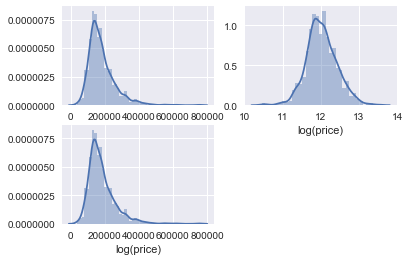

In [15]:
# 看一下SalePrice的分布情况
Sprice=pd.DataFrame({'SalePrice':Sprice,'log(price)':np.log1p(Sprice)})
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
sns.distplot(Sprice['SalePrice'],ax=ax1)
sns.distplot(Sprice['log(price)'],ax=ax2)
sns.distplot(np.exp(Sprice['log(price)']),ax=ax3)

np.exp(Sprice['log(price)'])
plt.show()

# 变量的类型转换

+ 明确变量的类型

*MSSubClass* 的值应该是categogy，我们需要把它转化昵称*string*类型

In [16]:
df_process['MSSubClass'].dtypes

dtype('int64')

In [17]:
df_process['MSSubClass'].isnull().any()

False

In [18]:
df_process['MSSubClass'] = df_process['MSSubClass'].astype(str)

In [19]:
df_process.shape

(2919, 79)

In [20]:
df_process['MSSubClass'].isnull().any()

False

In [21]:
df_process.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


+ 用value_counts看一下

In [22]:
df_process['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

+ One-hot设置0-1哑变量，用pd.get_dummies

In [23]:
pd.get_dummies(df_process['MSSubClass'],prefix='MSSubClass')

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [24]:
df_dummy_process = pd.get_dummies(df_process)
df_dummy_process2 = df_dummy_process
df_dummy_process.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
df_dummy_process.shape

(2919, 303)

In [26]:
df_process.shape

(2919, 79)

# 查看缺失值

In [27]:
# 缺失值
Mean = df_dummy_process.mean()
df_dummy_process = df_dummy_process.fillna(Mean)

In [28]:
df_dummy_process.tail()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,1,1,0,0,0,0,0
2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2918,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0
2919,74.0,9627,7,5,1993,1994,94.0,758.0,0.0,238.0,...,0,0,0,1,0,0,0,0,1,0


# 对numerical数据标准化

regression的回归模型比较傲娇，最好是把源数据给放在一个标准分布内。不要让数据间的差距太大。

In [29]:
df_dummy_process.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=303)

In [30]:
numerical_df = df_dummy_process.columns[df_dummy_process.dtypes!= 'object']
# 求出numerical列的mean和std
numerical_col_mean = df_dummy_process.loc[:,numerical_df].mean()
numerical_col_std = df_dummy_process.loc[:,numerical_df].std()
df_dummy_process.loc[:,numerical_df] = (df_dummy_process.loc[:,numerical_df] - numerical_col_mean)/numerical_col_std

In [31]:
df_dummy_process.tail()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
2915,-2.266564,-1.043758,-1.481667,1.289537,-0.043338,-0.682695,-0.572152,-0.969026,-0.29308,-0.033614,...,-0.052414,-0.298578,-0.049021,0.394951,-0.263816,-0.064238,-0.091035,-0.126513,0.463857,-0.302641
2916,-2.266564,-1.049083,-1.481667,-0.507197,-0.043338,-0.682695,-0.572152,-0.415828,-0.29308,-0.607034,...,-0.052414,-0.298578,-0.049021,0.394951,3.789226,-0.064238,-0.091035,-0.126513,-2.155097,-0.302641
2917,4.255477,1.246594,-0.772420,1.289537,-0.373465,0.561660,-0.572152,1.717937,-0.29308,-1.276024,...,-0.052414,-0.298578,-0.049021,0.394951,3.789226,-0.064238,-0.091035,-0.126513,-2.155097,-0.302641
2918,-0.342796,0.034599,-0.772420,-0.507197,0.682939,0.370221,-0.572152,-0.229233,-0.29308,0.032375,...,-0.052414,-0.298578,-0.049021,0.394951,-0.263816,-0.064238,-0.091035,-0.126513,0.463857,-0.302641
2919,0.220258,-0.068608,0.646073,-0.507197,0.715952,0.465941,-0.045913,0.694959,-0.29308,-0.734460,...,-0.052414,-0.298578,-0.049021,0.394951,-0.263816,-0.064238,-0.091035,-0.126513,0.463857,-0.302641


# 建模

In [32]:
# 分开训练集和测试集
df_train_f = df_dummy_process.loc[df_train.index,:]
df_test_f = df_dummy_process.loc[df_test.index,:]
X_train = df_train_f.values
X_test = df_test_f.values
y_train = Sprice.values

In [33]:
df_train_f.shape,df_test.shape

((1460, 303), (1459, 79))

In [34]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=15)
ridge_regression.fit(X_train,y_train)
y_test =ridge_regression.predict(X_test)
score = ridge_regression.score(X_test,y_test)
score


1.0

In [35]:
ridge_regression.coef_

array([[  1.06290414e+03,   5.39584396e+03,   9.05247065e+03,
          6.17294201e+03,   8.61513381e+03,   2.01653277e+03,
          3.99385738e+03,   7.61285406e+03,   1.56363200e+03,
         -3.13302367e+02,   8.15707622e+03,   6.37960301e+03,
          1.16396536e+04,  -1.75296454e+03,   1.46461880e+04,
          7.79735878e+02,  -1.51757096e+02,   2.54262914e+03,
          1.06996955e+03,  -2.47529718e+03,  -2.62977526e+03,
          2.98671593e+03,   3.75124296e+03,  -2.97989516e+02,
          3.29450372e+03,   3.79582567e+03,   2.06844575e+03,
          3.21373787e+02,   1.28877971e+02,   8.42837280e+02,
          1.98243791e+03,   7.17572974e+03,   3.63435095e+02,
         -1.24042392e+03,  -6.46075649e+02,  -1.62742507e+03,
          0.00000000e+00,  -1.50617519e+03,  -6.67823874e+02,
         -2.98096108e+02,   9.83205571e+02,   8.82101709e+02,
          7.52239566e+00,  -1.30551353e+02,  -2.90663653e+02,
          1.75665751e+03,   1.21113884e+03,  -1.85583638e+03,
        

In [36]:
ridge_regression.intercept_

array([  1.80159674e+05,   1.20177790e+01])

# ensemble

In [37]:
[]

[]

In [76]:
gender = ['aaa-男','aab-女']
np.random.seed(666)
df = pd.DataFrame({'A':np.random.randint(60,90,6),
                   'B':[gender[i]for i in np.random.randint(0,2,6)],
                  'C':np.random.randint(10,20,6)})
df

,A,B,C
0,72,aab-女,11
1,62,aab-女,10
2,73,aaa-男,18
3,66,aab-女,17
4,69,aaa-男,15
5,64,aab-女,12


df['A'] = df['A'].apply(lambda x:format(x,'.2f'))


In [70]:
df

,A,B,C
0,72.00,aab-女,11
1,62.00,aab-女,10
2,73.00,aaa-男,18
3,66.00,aab-女,17
4,69.00,aaa-男,15
5,64.00,aab-女,12


In [79]:
df['B'].duplicated()

0    False
1     True
2    False
3     True
4     True
5     True
Name: B, dtype: bool

In [74]:
df

,A,B,C
0,7200.00%,aab-女,11
1,6200.00%,aab-女,10
2,7300.00%,aaa-男,18
3,6600.00%,aab-女,17
4,6900.00%,aaa-男,15
5,6400.00%,aab-女,12


In [64]:
df['B'] = df['B'].str.replace('aab','cc')
df

,A,B,C
0,72,cc-女,11
1,62,cc-女,10
2,73,aaa-男,18
3,66,cc-女,17
4,69,aaa-男,15
5,64,cc-女,12


AttributeError: 'StringMethods' object has no attribute 'repalce'

In [49]:
df[df['B'].apply(lambda x:x not in ['aab-女'])]

,A,B,C
2,73,aaa-男,18
4,69,aaa-男,15


In [136]:
df['D'] = pd.cut(df['C'],[0,5,10,15,20],labels=['5以下','5-10','10-15','15以上'])
df

,A,B,C,D
0,72,aab-女,11,10-15
1,62,aab-女,10,5-10
2,73,aaa-男,18,15以上
3,66,aab-女,17,15以上
4,69,aaa-男,15,10-15
5,64,aab-女,12,10-15


In [132]:
df['D'] = df['B'].str[4:]
df

,A,B,C,D
0,72,aab-女,11,女
1,62,aab-女,10,女
2,73,aaa-男,18,男
3,66,aab-女,17,女
4,69,aaa-男,15,男
5,64,aab-女,12,女


In [127]:
df['B'].str.split('a',expand=True,n=1)

,0,1
0,,ab-女
1,,ab-女
2,,aa-男
3,,ab-女
4,,aa-男
5,,ab-女


In [128]:
df['B'].str.split('a',expand=True,n=2)

,0,1,2
0,,,b-女
1,,,b-女
2,,,a-男
3,,,b-女
4,,,a-男
5,,,b-女


In [129]:
df['B'].str.split('a',expand=True,n=3)

,0,1,2,3
0,,,b-女,None
1,,,b-女,None
2,,,,-男
3,,,b-女,None
4,,,,-男
5,,,b-女,None


In [118]:
df1 = pd.DataFrame([i.split('-')for i in df['B']],index=df.index,columns=['B1','B2'])
df2 = pd.merge(df,df1,right_index=True,left_index=True)

In [123]:
df['B'].str.split('-',expand=True)

,0,1
0,b,女
1,b,女
2,a,男
3,b,女
4,a,男
5,b,女


In [93]:
df.count()

A    6
B    6
dtype: int64

In [60]:
df['A'].replace([72,73],60,inplace= True)


In [69]:
df['B'].value_counts(normalize=True,sort=False)

男    0.333333
女    0.666667
Name: B, dtype: float64

In [70]:
df.tack()

AttributeError: 'DataFrame' object has no attribute 'tack'

In [73]:
bookmark houseprice D:\文件1

In [75]:
cd houseprice

(bookmark:houseprice) -> D:\文件1
D:\文件1


In [80]:
os.getcwd()

'D:\\文件1'

In [88]:
data = pd.read_csv('user_info_utf.csv',encoding='utf_8')
df = data.loc[:10,:]

In [89]:
cd houseprice

(bookmark:houseprice) -> D:\文件1
D:\文件1


In [90]:
df.to_excel(r'输出.xlsx')